# MEASO space paper

## Loading relevant libraries

In [1]:
%matplotlib inline
import xarray as xr
import pandas as pd
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from dask.distributed import Client, progress
import geopandas
import UsefulFunctions as uf
from clef.code import *
import os

## Setting up paralellisation prior to analysis

In [5]:
client = Client(n_workers = 12)

## Using clef to check what data is available in ACCESS-ESM 1.5
Currently using conservative water temperature in historical experiment as an example 

In [57]:
#Creating a session and connecting to database
db = connect()
s = Session()

Refer to https://github.com/coecms/clef/tree/master/clef/data for information on what variables are accepted by database query function.

In [58]:
constraints = {'variable_id': 'bigthetao', 'model': 'ACCESS-ESM1-5', 'frequency': 'mon', 'experiment_id':'historical'}
df = search(s, project = 'CMIP6', latest = True, **constraints)
# df

In [18]:
constraints = {'variable_id': 'areacello', 'model': 'ACCESS-ESM1-5', 'experiment_id':'historical', 'variant_label':'r1i1p1f1'}
df2 = search(s, project = 'CMIP6', latest = True, **constraints)
df2

project activity_id  \
path                                                                     
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...   CMIP6        CMIP   

                                                   institution_id  \
path                                                                
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...          CSIRO   

                                                        source_id source_type  \
path                                                                            
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...  ACCESS-ESM1-5       AOGCM   

                                                   experiment_id  \
path                                                               
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...    historical   

                                                   sub_experiment_id  \
path                                                                   
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...              none   

                                                   frequency  realm  \
path                                                                  
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...        fx  ocean   

                                                   variant_label  ...  \
path                                                              ...   
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...      r1i1p1f1  ...   

                                                   nominal_resolution  \
path                                                                    
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...             250 km   

                                                   table_id    version  \
path                                                                     
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...      Ofx  v20191115   

                                                     variable  \
path                                                            
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...  areacello   

                                                                                                 path  \
path                                                                                                    
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...  /g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACC...   

                                                                                             filename  \
path                                                                                                    
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...  {areacello_Ofx_ACCESS-ESM1-5_historical_r1i1p1...   

                                                   periods fdate tdate  \
path                                                                     
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...      []  None  None   

                                                   time_complete  
path                                                              
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...          None  

[1 rows x 23 columns]

In [19]:
constraints = {'variable_id': 'thkcello', 'model': 'ACCESS-ESM1-5', 'experiment_id':'historical', 'variant_label':'r1i1p1f1'}
df3 = search(s, project = 'CMIP6', latest = True, **constraints)
df3

project activity_id  \
path                                                                     
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...   CMIP6        CMIP   

                                                   institution_id  \
path                                                                
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...          CSIRO   

                                                        source_id source_type  \
path                                                                            
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...  ACCESS-ESM1-5       AOGCM   

                                                   experiment_id  \
path                                                               
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...    historical   

                                                   sub_experiment_id  \
path                                                                   
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...              none   

                                                   frequency  realm  \
path                                                                  
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...        fx  ocean   

                                                   variant_label  ...  \
path                                                              ...   
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...      r1i1p1f1  ...   

                                                   nominal_resolution  \
path                                                                    
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...             250 km   

                                                   table_id    version  \
path                                                                     
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...      Ofx  v20191115   

                                                    variable  \
path                                                           
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...  thkcello   

                                                                                                 path  \
path                                                                                                    
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...  /g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACC...   

                                                                                             filename  \
path                                                                                                    
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...  {thkcello_Ofx_ACCESS-ESM1-5_historical_r1i1p1f...   

                                                   periods fdate tdate  \
path                                                                     
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...      []  None  None   

                                                   time_complete  
path                                                              
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCE...          None  

[1 rows x 23 columns]

In [7]:
#Checking column names
df.columns

Index(['project', 'activity_id', 'institution_id', 'source_id', 'source_type',
       'experiment_id', 'sub_experiment_id', 'frequency', 'realm',
       'variant_label', 'member_id', 'variable_id', 'grid_label',
       'nominal_resolution', 'table_id', 'version', 'variable', 'path',
       'filename', 'periods', 'fdate', 'tdate', 'time_complete'],
      dtype='object')

## Creating filepaths for the files we are interested in
Currently choosing the first option in the query data frame

In [59]:
path = df['path'][0]
filename = sorted([f[0] for f in zip(df['filename'][0])])
filepath = [os.path.join(path, f) for f in filename]
# filepath

## Checking data prior to further processing
Currently choosing the decade between 2000 and 2010

In [60]:
sst = nc.Dataset(filepath[-2])
print(sst)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.7 CMIP-6.2
    activity_id: CMIP
    branch_method: standard
    branch_time_in_child: 0.0
    branch_time_in_parent: 21915.0
    creation_date: 2019-11-15T15:50:53Z
    data_specs_version: 01.00.30
    experiment: all-forcing simulation of the recent past
    experiment_id: historical
    external_variables: areacello volcello
    forcing_index: 1
    frequency: mon
    further_info_url: https://furtherinfo.es-doc.org/CMIP6.CSIRO.ACCESS-ESM1-5.historical.none.r1i1p1f1
    grid: native atmosphere N96 grid (145x192 latxlon)
    grid_label: gn
    history: 2019-11-15T15:50:53Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.
    initialization_index: 1
    institution: Commonwealth Scientific and Industrial Research Organisation, Aspendale, Victoria 3195, Australia
    institution_id: CSIRO
    mip_era: CMIP6
    nominal_resolution: 250 km


In [9]:
print(sst.__dict__)

{'Conventions': 'CF-1.7 CMIP-6.2', 'activity_id': 'CMIP', 'branch_method': 'standard', 'branch_time_in_child': 0.0, 'branch_time_in_parent': 21915.0, 'creation_date': '2019-11-15T15:50:53Z', 'data_specs_version': '01.00.30', 'experiment': 'all-forcing simulation of the recent past', 'experiment_id': 'historical', 'external_variables': 'areacello volcello', 'forcing_index': 1, 'frequency': 'mon', 'further_info_url': 'https://furtherinfo.es-doc.org/CMIP6.CSIRO.ACCESS-ESM1-5.historical.none.r1i1p1f1', 'grid': 'native atmosphere N96 grid (145x192 latxlon)', 'grid_label': 'gn', 'history': '2019-11-15T15:50:53Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.', 'initialization_index': 1, 'institution': 'Commonwealth Scientific and Industrial Research Organisation, Aspendale, Victoria 3195, Australia', 'institution_id': 'CSIRO', 'mip_era': 'CMIP6', 'nominal_resolution': '250 km', 'notes': "Exp: ESM-historical; Local ID: HI-05; Variable: bigthetao (['temp'])",

In [61]:
[print(dim) for dim in sst.dimensions.values()]

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 120
<class 'netCDF4._netCDF4.Dimension'>: name = 'lev', size = 50
<class 'netCDF4._netCDF4.Dimension'>: name = 'j', size = 300
<class 'netCDF4._netCDF4.Dimension'>: name = 'i', size = 360
<class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2
<class 'netCDF4._netCDF4.Dimension'>: name = 'vertices', size = 4


[None, None, None, None, None, None]

In [62]:
[print(var) for var in sst.variables.values()]

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    units: days since 1850-01-01
    calendar: proleptic_gregorian
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: time
current shape = (120,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (120, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lev(lev)
    bounds: lev_bnds
    units: m
    axis: Z
    positive: down
    long_name: ocean depth coordinate
    standard_name: depth
unlimited dimensions: 
current shape = (50,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lev_bnds(lev, bnds)
unlimited dimensions: 
current shape = (50, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
int32 j(j)
    

[None, None, None, None, None, None, None, None, None, None, None]

## Loading data
Choosing one decade only, which include the years between 2000 and 2010. Default missing values changed to NAs in the data array. Select upper 200 m.

In [63]:
sst = xr.open_dataset(filepath[-2], mask_and_scale = True)

#Select only data that is in the upper 200 m - Using lower bound of the depth bins
# sst = sst.bigthetao[:,sst.lev_bnds[:,1] <= 200]

In [129]:
sst.vertices_latitude[0:77,0,:]

<xarray.DataArray 'vertices_latitude' (j: 77, vertices: 4)>
array([[-78.      , -78.      , -77.753166, -77.753166],
       [-77.753166, -77.753166, -77.505707, -77.505707],
       [-77.505707, -77.505707, -77.256996, -77.256996],
       ...,
       [-32.997257, -32.997257, -31.999216, -31.999216],
       [-31.999216, -31.999216, -30.999922, -30.999922],
       [-30.999922, -30.999922, -30.      , -30.      ]])
Coordinates:
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 67 68 69 70 71 72 73 74 75 76
    i          int32 0
    latitude   (j) float64 -77.88 -77.63 -77.38 -77.13 ... -32.5 -31.5 -30.5
    longitude  (j) float64 ...
Dimensions without coordinates: vertices
Attributes:
    units:    degrees_north

In [124]:
so = (sst.latitude[:,0] <= -30).values
sst.latitude[so, 0]

<xarray.DataArray 'latitude' (j: 77)>
array([-77.876625, -77.629715, -77.381706, -77.132294, -76.880531, -76.626129,
       -76.368141, -76.106285, -75.839645, -75.567932, -75.29026 , -75.006363,
       -74.715355, -74.417   , -74.110443, -73.795479, -73.471268, -73.137634,
       -72.793785, -72.439552, -72.074196, -71.697586, -71.308998, -70.908363,
       -70.494987, -70.068848, -69.629288, -69.176323, -68.709351, -68.228439,
       -67.733017, -67.223198, -66.698479, -66.159004, -65.604324, -65.034637,
       -64.449539, -63.849281, -63.233509, -62.602528, -61.956032, -61.294376,
       -60.617313, -59.92524 , -59.21796 , -58.495926, -57.758991, -57.007656,
       -56.241821, -55.462036, -54.668247, -53.861053, -53.040443, -52.207062,
       -51.360947, -50.502777, -49.632637, -48.751244, -47.858719, -46.955818,
       -46.042698, -45.120152, -44.188366, -43.248169, -42.299767, -41.344021,
       -40.381168, -39.41209 , -38.437046, -37.456936, -36.472038, -35.483269,
       -34.490921, -33.49593 , -32.498589, -31.499844, -30.5     ])
Coordinates:
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 67 68 69 70 71 72 73 74 75 76
    i          int32 0
    latitude   (j) float64 -77.88 -77.63 -77.38 -77.13 ... -32.5 -31.5 -30.5
    longitude  (j) float64 ...
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    bounds:         vertices_latitude

### Correcting latitude and longitude dimensions

In [13]:
sst = uf.corrlong(sst)
sst

<xarray.DataArray 'bigthetao' (time: 120, lev: 20, latitude: 300, longitude: 360)>
[259200000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2000-01-16T12:00:00 ... 2009-12-16T12:00:00
  * lev        (lev) float64 5.0 15.0 25.0 35.0 45.0 ... 165.0 175.0 185.0 195.0
  * latitude   (latitude) float64 -77.88 -77.63 -77.38 ... 65.21 65.21 65.21
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:   sea_water_conservative_temperature
    long_name:       Sea Water Conservative Temperature
    comment:         Sea water conservative temperature (this should be contr...
    units:           degC
    original_units:  K
    history:         2019-11-15T15:50:50Z altered by CMOR: Converted units fr...
    cell_methods:    area: mean where sea time: mean
    cell_measures:   area: areacello volume: volcello

### Selecting data for the Southern Ocean
Calculating mean water temperature per month within the SO (30S to 90S).

In [14]:
sst_upper200_SO = sst.sel(latitude = slice(-90, -30))
sst_upper200_SO

<xarray.DataArray 'bigthetao' (time: 120, lev: 20, latitude: 77, longitude: 360)>
[66528000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2000-01-16T12:00:00 ... 2009-12-16T12:00:00
  * lev        (lev) float64 5.0 15.0 25.0 35.0 45.0 ... 165.0 175.0 185.0 195.0
  * latitude   (latitude) float64 -77.88 -77.63 -77.38 ... -32.5 -31.5 -30.5
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:   sea_water_conservative_temperature
    long_name:       Sea Water Conservative Temperature
    comment:         Sea water conservative temperature (this should be contr...
    units:           degC
    original_units:  K
    history:         2019-11-15T15:50:50Z altered by CMOR: Converted units fr...
    cell_methods:    area: mean where sea time: mean
    cell_measures:   area: areacello volume: volcello

## Getting horizontal area of grid

In [20]:
filename = [f[0] for f in zip(df2['filename'][0])]
filepath = os.path.join(df2['path'][0], filename[0])

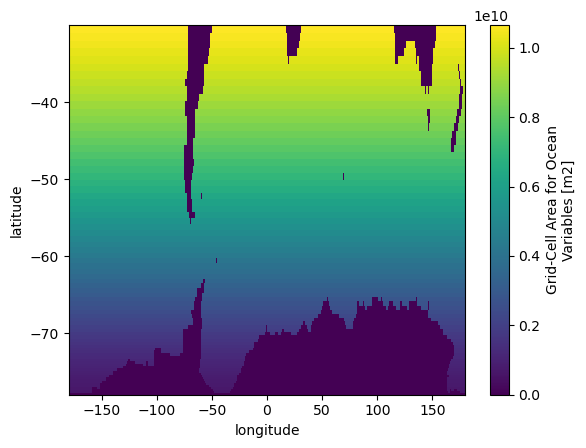

In [21]:
area = xr.open_dataarray(filepath, mask_and_scale = True, drop_variables = ("vertices_latitude", "vertices_longitude"))
#Correcting longitude prior to extracting Southern Ocean
area = uf.corrlong(area)
#Extracting Southern Ocean
area = area.sel(latitude = slice(-90, -30))
#Checking data
area.plot()

## Getting thickness (vertical extent) of grid cells

In [22]:
filename = [f[0] for f in zip(df3['filename'][0])]
filepath = os.path.join(df3['path'][0], filename[0])

In [23]:
height = xr.open_dataset(filepath, mask_and_scale = True)
#Correcting longitude prior to extracting Southern Ocean
height = uf.corrlong(height)
#Extracting Southern Ocean
height = height.sel(latitude = slice(-90, -30))
#Select only data that is in the upper 200 m - Using lower bound of the depth bins
height = height.thkcello[height.lev_bnds[:,1] <= 200]
#Checking data
height

<xarray.DataArray 'thkcello' (lev: 20, latitude: 77, longitude: 360)>
[554400 values with dtype=float32]
Coordinates:
  * lev        (lev) float64 5.0 15.0 25.0 35.0 45.0 ... 165.0 175.0 185.0 195.0
  * latitude   (latitude) float64 -77.88 -77.63 -77.38 ... -32.5 -31.5 -30.5
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  cell_thickness
    long_name:      Ocean Model Cell Thickness
    comment:        'Thickness' means the vertical extent of a layer. 'Cell' ...
    units:          m
    cell_methods:   area: mean
    cell_measures:  area: areacello volume: volcello
    history:        2019-11-15T14:47:29Z altered by CMOR: replaced missing va...

### Calculating weights from thickness data
Dividing the vertical height of each grid cell by the sum of heights for all grid cells in the upper 200 m.

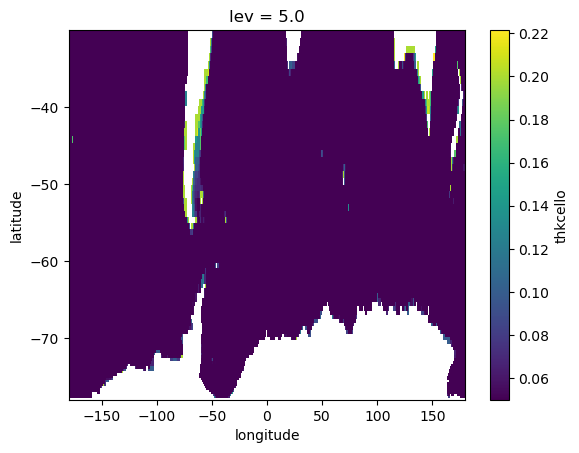

In [24]:
sum_heights = height.sum('lev')
weights_vert_levels = height/sum_heights

#Checking data
weights_vert_levels[0].plot()

## Calculating vertically weighted means

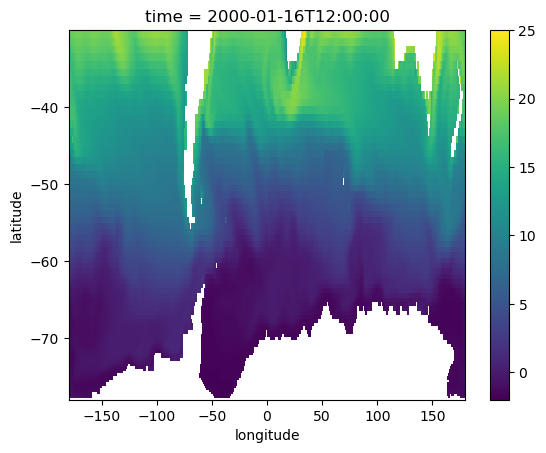

In [25]:
sst_upper200mean_SO = (sst_upper200_SO*weights_vert_levels).sum('lev')

#Applying land mask to the data
sst_upper200mean_SO = sst_upper200mean_SO.where(sum_heights > 0)

#Checking first time step
sst_upper200mean_SO[0].plot(vmin = -2, vmax = 25)

## Loading shapefile with MEASO regions
MEASO regions being used in the analysis were shared by A. Constable on 2021-06-24.

In [26]:
#Note that the full file path is being used.
regions = geopandas.read_file(r'/g/data/v45/la6889/GIS_DataBase/Shapefiles/MEASO_shapes_withShelf/MEASO_shapes_withShelf.shp')
regions

name          sector             zone  \
0   WPA-O    West Pacific   Antarctic Open   
1   WPA-N    West Pacific  Antarctic Shelf   
2   WPA-O    West Pacific   Antarctic Open   
3     WPS    West Pacific     Subantarctic   
4     WPN    West Pacific         Northern   
5     WPT    West Pacific        Temperate   
6   EPA-N    East Pacific  Antarctic Shelf   
7   EPA-O    East Pacific   Antarctic Open   
8     EPS    East Pacific     Subantarctic   
9     EPN    East Pacific         Northern   
10    EPT    East Pacific        Temperate   
11  AOA-N        Atlantic  Antarctic Shelf   
12  AOA-O        Atlantic   Antarctic Open   
13    AOT        Atlantic        Temperate   
14    AOS        Atlantic     Subantarctic   
15    AON        Atlantic         Northern   
16  CIA-N  Central Indian  Antarctic Shelf   
17  CIA-O  Central Indian   Antarctic Open   
18    CIS  Central Indian     Subantarctic   
19    CIN  Central Indian         Northern   
20    CIT  Central Indian        Temperate   
21  EIA-N     East Indian  Antarctic Shelf   
22  EIA-O     East Indian   Antarctic Open   
23    EIS     East Indian     Subantarctic   
24    EIN     East Indian         Northern   
25    EIT     East Indian        Temperate   
26  WPA-N    West Pacific  Antarctic Shelf   
27  WPA-O    West Pacific   Antarctic Open   
28  WPA-N    West Pacific  Antarctic Shelf   
29    WPS    West Pacific     Subantarctic   
30    WPN    West Pacific         Northern   
31    WPT    West Pacific        Temperate   

                                             geometry  
0   POLYGON ((-125.00000 -65.20000, -125.00000 -65...  
1   POLYGON ((-125.00000 -72.25443, -125.00000 -72...  
2   POLYGON ((-180.00000 -72.36900, -180.00000 -72...  
3   POLYGON ((-125.00000 -56.80000, -125.00000 -57...  
4   POLYGON ((-125.00000 -40.00000, -125.00000 -40...  
5   POLYGON ((-125.00000 -30.00000, -125.00000 -30...  
6   POLYGON ((-125.00000 -75.00184, -125.00000 -75...  
7   POLYGON ((-125.00000 -72.25443, -125.00000 -72...  
8   POLYGON ((-125.00000 -65.20000, -125.00000 -65...  
9   POLYGON ((-125.00000 -56.80000, -125.00000 -56...  
10  POLYGON ((-125.00000 -40.00000, -125.00000 -39...  
11  POLYGON ((-57.02029 -63.34214, -57.01404 -63.3...  
12  POLYGON ((-57.15097 -61.21343, -57.16815 -61.1...  
13  POLYGON ((-62.79726 -55.70000, -62.94048 -55.5...  
14  POLYGON ((-59.00000 -59.40791, -59.14064 -59.2...  
15  POLYGON ((30.00000 -41.70000, 30.00000 -41.900...  
16  POLYGON ((30.00000 -70.56253, 30.00000 -70.451...  
17  POLYGON ((30.00000 -68.91757, 30.00000 -68.856...  
18  POLYGON ((30.00000 -56.50000, 30.00000 -56.300...  
19  POLYGON ((30.00000 -47.90000, 30.00000 -47.700...  
20  POLYGON ((30.00000 -41.70000, 30.00000 -41.501...  
21  POLYGON ((115.00000 -67.52494, 115.00000 -67.4...  
22  POLYGON ((115.00000 -64.23531, 115.00000 -64.0...  
23  POLYGON ((115.00000 -59.50000, 115.00000 -59.3...  
24  POLYGON ((115.00000 -48.60000, 115.00000 -48.4...  
25  POLYGON ((115.00000 -40.10000, 115.00000 -39.9...  
26  POLYGON ((169.49154 -71.74412, 169.61905 -71.7...  
27  POLYGON ((170.00000 -70.63687, 170.00000 -70.6...  
28  POLYGON ((180.00000 -70.78000, 180.00000 -70.8...  
29  POLYGON ((170.00000 -62.20000, 170.00000 -62.0...  
30  POLYGON ((170.00000 -56.80000, 170.00000 -56.6...  
31  POLYGON ((170.00000 -47.50000, 170.00000 -47.3...

### Checking MEASO regions and data are correctly aligned

<AxesSubplot:title={'center':'time = 2000-01-16T12:00:00'}, xlabel='longitude', ylabel='latitude'>

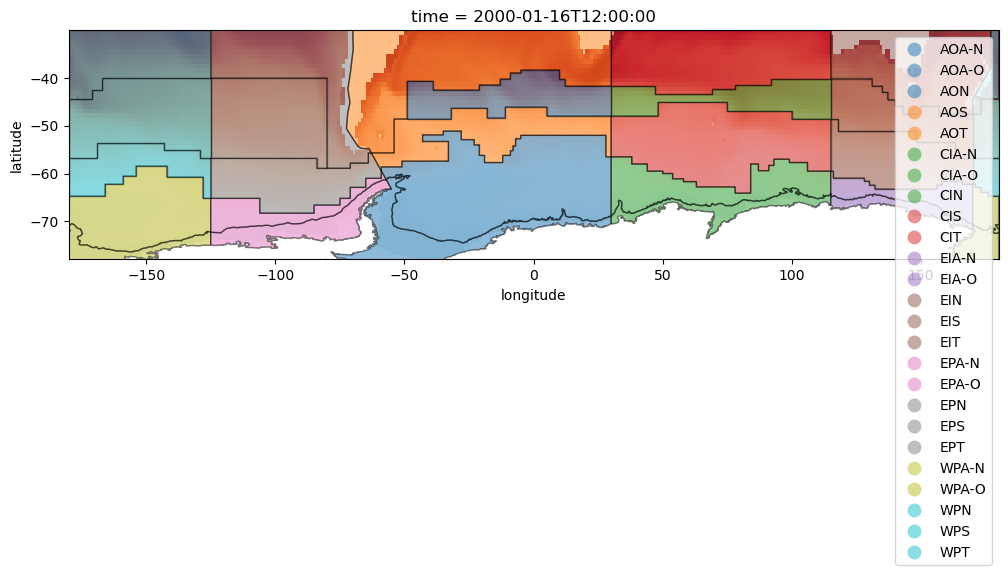

In [27]:
# Plot shapefile over the raster to ensure they both have the same CRS and cover the same area
#Initialise figure
fig, ax = plt.subplots(figsize = (12, 15))

#Plot just one timestep of the data array
sst_upper200mean_SO[0].plot(ax = ax, add_colorbar = False)

#Plot shapefile over the top and show each sector in different colour
regions.plot(ax = ax, column = 'name', legend = True, alpha = 0.5, edgecolor = 'black')

<AxesSubplot:title={'center':'time = 2000-01-16T12:00:00, spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

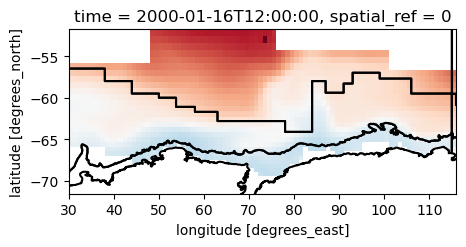

In [56]:
# reg = regions.query('name == "CIS"')
# reg.plot()
fig, ax = plt.subplots(figsize = (5, 20))
sst_upper200mean_SO.rio.clip(reg.geometry, reg.crs, drop = True, invert = False, all_touched = True)[0].plot(ax = ax, add_colorbar = False)
regions.geometry.boundary.plot(ax = ax, color = None, edgecolor = 'black')

## Extracting data per MEASO region

In [37]:
#Getting names of regions from shapefile
regionNames = sorted(set(regions.name.values))

#Subsetting shapefiles into regions - Initialise dictionary that will contain sector limits
MEASOregions = {}

#Saving each sector as an entry in the dictionary
for i in regionNames:
    MEASOregions[f"{i}"] = regions.query(f'name == "{i}"')

In [38]:
#Subsetting shapefiles into sectors - Initialise dictionary that will contain sector limits
clipped_varInt = {}
clipped_area = {}

#Saving each sector as an entry in the dictionary
for i in regionNames:
    clipped_varInt[f"{i}"] = uf.clipDataArray(sst_upper200mean_SO, shp = MEASOregions[i])
    clipped_area[f"{i}"] = uf.clipDataArray(area, shp = MEASOregions[i])

<AxesSubplot:title={'center':'time = 2000-01-16T12:00:00, spatial_ref = 0'}, xlabel='longitude', ylabel='latitude'>

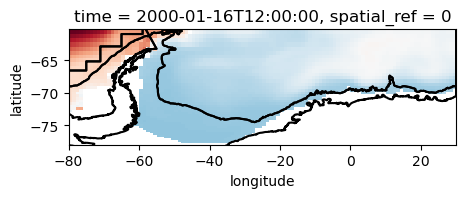

In [39]:
fig, ax = plt.subplots(figsize = (5, 20))

#Plot just one timestep of the data array
sst_upper200mean_SO.sel(longitude = slice(-80, 30), latitude = slice(-78, -60))[0].plot(ax = ax, add_colorbar = False)

#Plot shapefile over the top and show each sector in different colour
regions.geometry.boundary.plot(ax = ax, color = None, edgecolor = 'black')

<AxesSubplot:title={'center':'time = 2000-01-16T12:00:00, lev = 5.0, bin_dept...'}, xlabel='i', ylabel='j'>

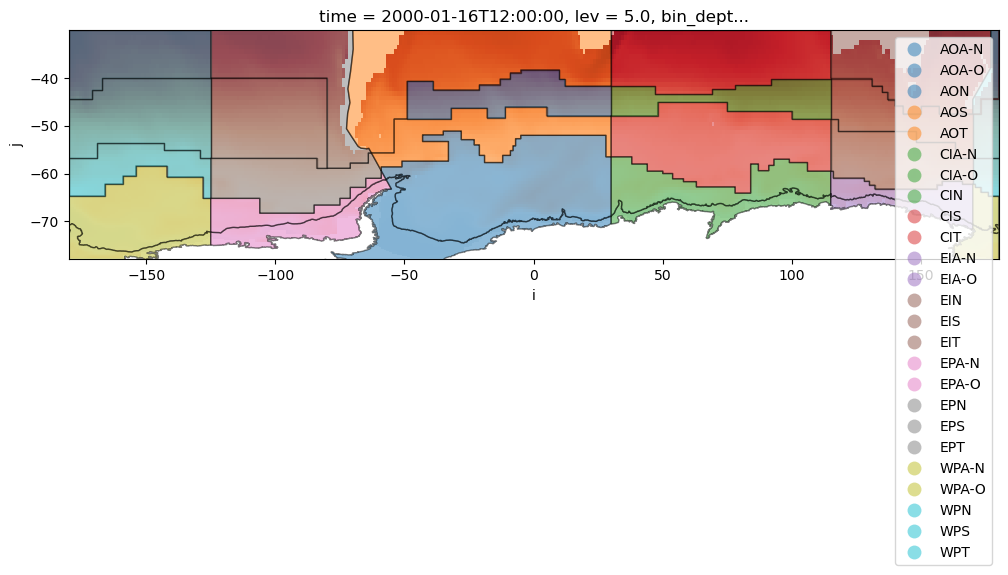

In [303]:
# Plot shapefile over the raster to ensure they both have the same CRS and cover the same area
#Initialise figure
fig, ax = plt.subplots(figsize = (12, 15))

#Plot just one timestep of the data array
latsSO.plot(ax = ax, add_colorbar = False)

#Plot shapefile over the top and show each sector in different colour
regions.plot(ax = ax, column = 'name', legend = True, alpha = 0.5, edgecolor = 'black')

### Checking results of extraction

<AxesSubplot:title={'center':'time = 2000-01-16T12:00:00, spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

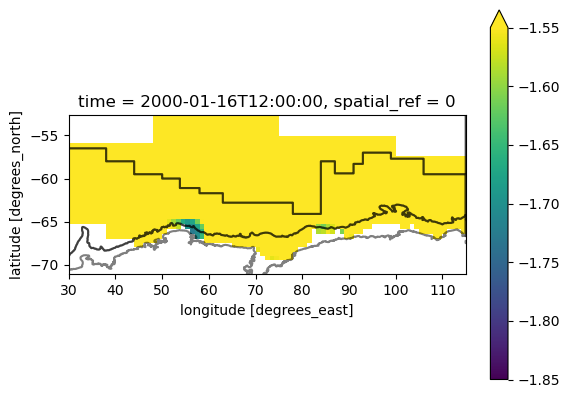

In [45]:
fig, ax = plt.subplots()
clipped_varInt["CIS"][0].plot(ax = ax, vmin = -1.85, vmax = -1.55)
regions.geometry.boundary.plot(ax = ax, color = None, edgecolor = 'black', alpha = 0.5)

### Calculating weights from horizontal area

<AxesSubplot:title={'center':'time = 2000-01-16T12:00:00, spatial_ref = 0'}, xlabel='longitude', ylabel='latitude'>

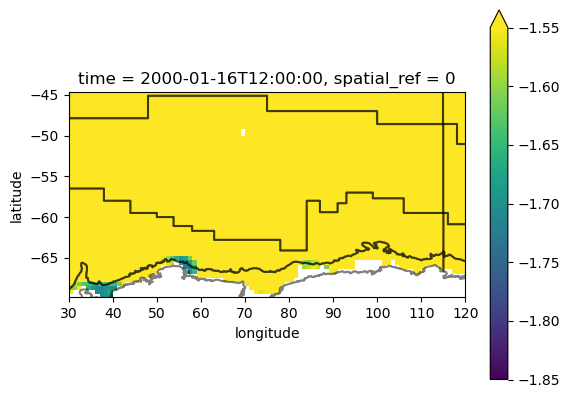

In [47]:
fig, ax = plt.subplots()
sst_upper200mean_SO[0].sel(longitude = slice(30, 120), latitude = slice(-70, -45)).plot(ax = ax, vmin = -1.85, vmax = -1.55)
regions.geometry.boundary.plot(ax = ax, color = None, edgecolor = 'black', alpha = 0.5)

## Calculating weighted means

In [31]:
#Getting a list of the years included in the data
years = sst_upper200_SO.indexes['time'].year

#Loop through all sectors
for region in regionNames:
    #Slice data per year and calculate seasonal weighted means
    for yr in years:
        x = uf.weightedMeans(clipped_varInt[region].sel(time = str(yr)), clipped_area[region], meanby = 'month')
        #Add time dimension containing the year for which calculations are done
        x = uf.addTimeYear(x, yr, by = 'month')
        #Save netcdf file
        x.to_netcdf('YearlyMonthlyMeans_' + region + 'region_2000-2009.nc')
    #Remove unused variables
    del x

#Remove unused variables
del years

In [36]:
xr.open_dataarray('YearlyMonthlyMeans_WPNregion_2000-2009.nc')

<xarray.DataArray (month: 12)>
array([6.122052, 6.522734, 6.63957 , 6.382081, 6.104219, 5.707814, 5.344544,
       4.997611, 4.780879, 4.824975, 5.062714, 5.429814], dtype=float32)
Coordinates:
    spatial_ref  int64 ...
  * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
    time         (month) object ...

In [85]:
x = xr.open_dataset(filepath)
x.attrs

{'Conventions': 'CF-1.7 CMIP-6.2',
 'activity_id': 'CMIP',
 'branch_method': 'standard',
 'branch_time_in_child': 0.0,
 'branch_time_in_parent': 21915.0,
 'creation_date': '2019-11-15T14:47:31Z',
 'data_specs_version': '01.00.30',
 'experiment': 'all-forcing simulation of the recent past',
 'experiment_id': 'historical',
 'external_variables': 'areacello volcello',
 'forcing_index': 1,
 'frequency': 'fx',
 'further_info_url': 'https://furtherinfo.es-doc.org/CMIP6.CSIRO.ACCESS-ESM1-5.historical.none.r1i1p1f1',
 'grid': 'native atmosphere N96 grid (145x192 latxlon)',
 'grid_label': 'gn',
 'history': '2019-11-15T14:47:31Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.',
 'initialization_index': 1,
 'institution': 'Commonwealth Scientific and Industrial Research Organisation, Aspendale, Victoria 3195, Australia',
 'institution_id': 'CSIRO',
 'mip_era': 'CMIP6',
 'nominal_resolution': '250 km',
 'notes': "Exp: ESM-historical; Local ID: HI-05; Variable: th